In [4]:
import pandas as pd
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
path = r'C:\Users\mysel\OneDrive\Documents\Kaggle\train.csv'

In [6]:
train = pd.read_csv(os.path.join(path, 'train.csv'))

print(train.head())

print(train.shape)

inputs = train.columns.tolist()
inputs.remove('target')

   id  target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0   7       0          2              2          5              1   
1   9       0          1              1          7              0   
2  13       0          5              4          9              1   
3  16       0          0              1          2              0   
4  17       0          0              2          0              1   

   ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ...  \
0              0              0              1              0  ...   
1              0              0              0              1  ...   
2              0              0              0              1  ...   
3              0              1              0              0  ...   
4              0              1              0              0  ...   

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15_bin  \
0           9           1           5           8               0   
1           3           1 

In [7]:
print(train.columns)

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


### Assign Missing Values as NaN

In [8]:
train[train.iloc[:, 3] == -1].head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
847,2210,0,5,-1,0,-1,-1,0,1,0,...,5,2,2,9,0,0,0,0,0,0
11840,29812,0,0,-1,8,0,0,0,0,0,...,6,1,3,9,0,0,1,1,0,0
13670,34370,0,5,-1,0,-1,-1,0,0,1,...,4,0,1,6,0,1,0,0,0,0
13804,34695,0,0,-1,0,-1,-1,1,0,0,...,5,2,1,4,0,1,0,0,1,0
14002,35176,0,0,-1,7,0,6,0,1,0,...,2,2,1,9,0,1,1,0,1,0


In [9]:
train = train.replace(-1, np.NaN)

### Convert Categorical Data type as Object

Filter numerical,  categorical and bin variables from the dataset<br>
1. As per the problem statement, columns with 'cat' in the column names are categorical, 
2. Columns with 'bin' in the column names are binary variables
3. Remaining variables are either numeric or ordinal variables (I'll start by treating all remainig variables as numeric and change the approach after I see something in my data to break my assumption.


In [14]:
cat_mask = ['cat' in x for x in train.columns]
print(cat_mask)

[False, False, False, True, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [15]:
cat_columns = list(train.columns[cat_mask])
print(cat_columns)
train[cat_columns].head()

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
0,2.0,1.0,0.0,10.0,1.0,nan,0,1.0,4,1.0,0,0.0,1,12
1,1.0,0.0,0.0,11.0,1.0,nan,0,nan,11,1.0,1,2.0,1,19
2,4.0,1.0,0.0,7.0,1.0,nan,0,nan,14,1.0,1,2.0,1,60
3,1.0,0.0,0.0,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104
4,2.0,1.0,0.0,11.0,1.0,nan,0,nan,14,1.0,1,2.0,1,82


In [20]:
train[cat_columns] = train[cat_columns].astype(str)
train[cat_columns] = train[cat_columns].replace('nan', np.NaN)

In [21]:
train[cat_columns].dtypes

ps_ind_02_cat    object
ps_ind_04_cat    object
ps_ind_05_cat    object
ps_car_01_cat    object
ps_car_02_cat    object
ps_car_03_cat    object
ps_car_04_cat    object
ps_car_05_cat    object
ps_car_06_cat    object
ps_car_07_cat    object
ps_car_08_cat    object
ps_car_09_cat    object
ps_car_10_cat    object
ps_car_11_cat    object
dtype: object

In [22]:
train['id'] = train['id'].astype(str)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  object 
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   594996 non-null  object 
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595129 non-null  object 
 6   ps_ind_05_cat   589403 non-null  object 
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [24]:
train[cat_columns[0]].value_counts()

1.0    431859
2.0    123573
3.0     28186
4.0     11378
Name: ps_ind_02_cat, dtype: int64

In [25]:
bin_mask = ['bin' in x for x in train.columns]
bin_columns = list(train.columns[bin_mask])
print(bin_columns + cat_columns)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


In [26]:
numeric_mask = [(x not in cat_columns + bin_columns) and (x not in ['id', 'target']) for x in train.columns] 
numeric_cols = list(train.columns[numeric_mask])
print(numeric_cols)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


In [27]:
train[numeric_cols].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,...,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,487440.000000,595207.000000,595211.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,0.610991,0.439184,0.894047,2.346100,0.379947,0.813265,...,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.287643,0.404264,0.345413,0.832495,0.058300,0.224588,...,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.633443,2.000000,0.316228,0.670867,...,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.801561,3.000000,0.374166,0.765811,...,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.083974,3.000000,0.400000,0.906190,...,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,...,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


### Data Exploration

In [28]:
print(len(numeric_cols))
train.head()

26


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


No handles with labels found to put in legend.


<Figure size 1080x1296 with 0 Axes>

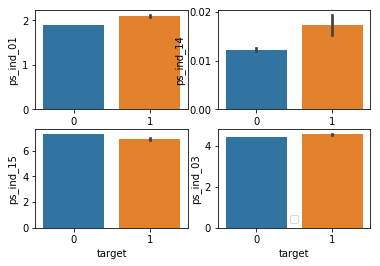

In [89]:
plt.figure(figsize=(15, 18))
fig, ax = plt.subplots(2,2)

for ix, col in enumerate(numeric_cols[:4]):
    ix1 = ix%2
    ix2 = [0,1,1,0][ix]
    sns.barplot(train['target'], train[col], ax=ax[ix1][ix2])

plt.legend()
plt.show()

### Numeric Cols Exploration

In [41]:
# col = numeric_cols[0]
for col in numeric_cols:
    print('\n' + col + ' column')
    print(train[col].value_counts().shape)
    if train[col].value_counts().shape[0] <10:
        print(train[col].value_counts())
    else:
        print(train[col].head())


ps_ind_01 column
(8,)
0    187594
1    143984
2     82468
5     61464
3     51193
4     33524
6     17682
7     17303
Name: ps_ind_01, dtype: int64

ps_ind_03 column
(12,)
0    5
1    7
2    9
3    2
4    0
Name: ps_ind_03, dtype: int64

ps_ind_14 column
(5,)
0    588832
1      5495
2       744
3       136
4         5
Name: ps_ind_14, dtype: int64

ps_ind_15 column
(14,)
0    11
1     3
2    12
3     8
4     9
Name: ps_ind_15, dtype: int64

ps_reg_01 column
(10,)
0    0.7
1    0.8
2    0.0
3    0.9
4    0.7
Name: ps_reg_01, dtype: float64

ps_reg_02 column
(19,)
0    0.2
1    0.4
2    0.0
3    0.2
4    0.6
Name: ps_reg_02, dtype: float64

ps_reg_03 column
(5012,)
0    0.718070
1    0.766078
2         NaN
3    0.580948
4    0.840759
Name: ps_reg_03, dtype: float64

ps_car_11 column
(4,)
3.0    318919
2.0    189353
1.0     60952
0.0     25983
Name: ps_car_11, dtype: int64

ps_car_12 column
(183,)
0    0.400000
1    0.316228
2    0.316228
3    0.374166
4    0.316070
Name: ps_car_12, dtyp

I see that numeric variables I assumed are not completely numeric. They are ordinal. It will be useful to treat them as ordinal. I'll get back to that later.

### Logit charts of Numeric columns

(200000, 58) (200000,) (200000, 27)
           count      mean
ps_ind_01                 
0          60342  0.473634
1          46987  0.485730
2          27771  0.499514
3          18132  0.528623
4          12212  0.540288
5          21815  0.531102
6           6420  0.554517
7           6321  0.537257
ps_ind_03
               count      mean
bins                          
(-0.001, 1.0]  29907  0.535092
(1.0, 2.0]     29418  0.452886
(2.0, 3.0]     25490  0.449000
(3.0, 4.0]     21598  0.472590
(4.0, 5.0]     22036  0.524233
(5.0, 6.0]     21832  0.537560
(6.0, 8.0]     32126  0.521571
(8.0, 11.0]    17593  0.510317
            count      mean
ps_ind_14                  
0          197485  0.498939
1            2156  0.582096
2             301  0.581395
3              51  0.627451
4               7  0.714286
ps_ind_15
               count      mean
bins                          
(-0.001, 3.0]  34230  0.540345
(3.0, 5.0]     29286  0.518336
(5.0, 6.0]     19984  0.519365
(6.0, 7.0]   

<Figure size 1440x1152 with 0 Axes>

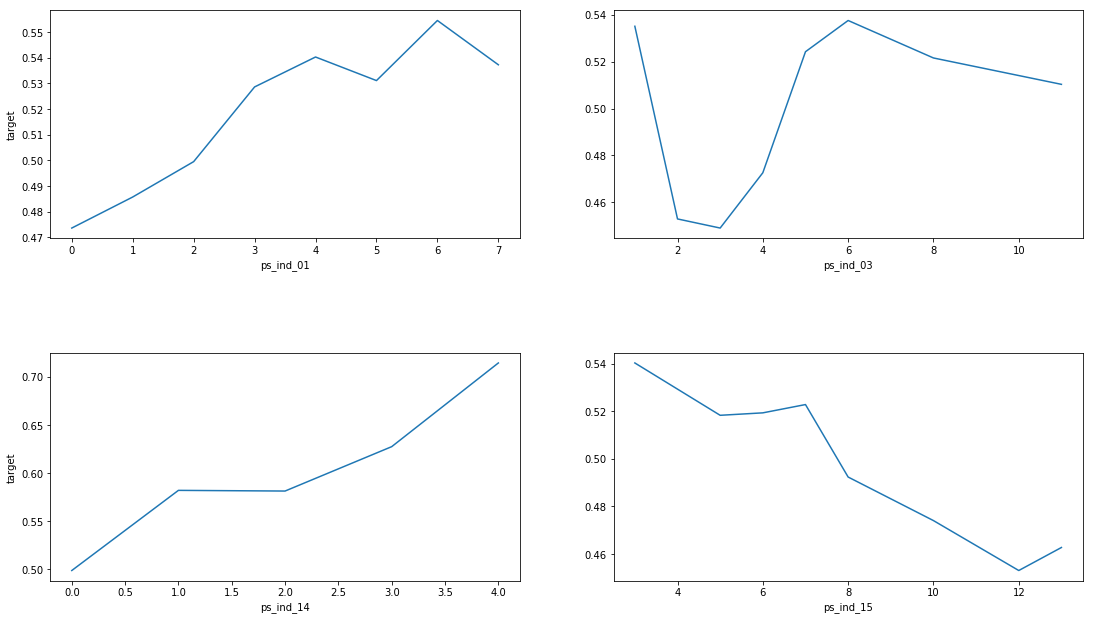

<Figure size 1440x1152 with 0 Axes>

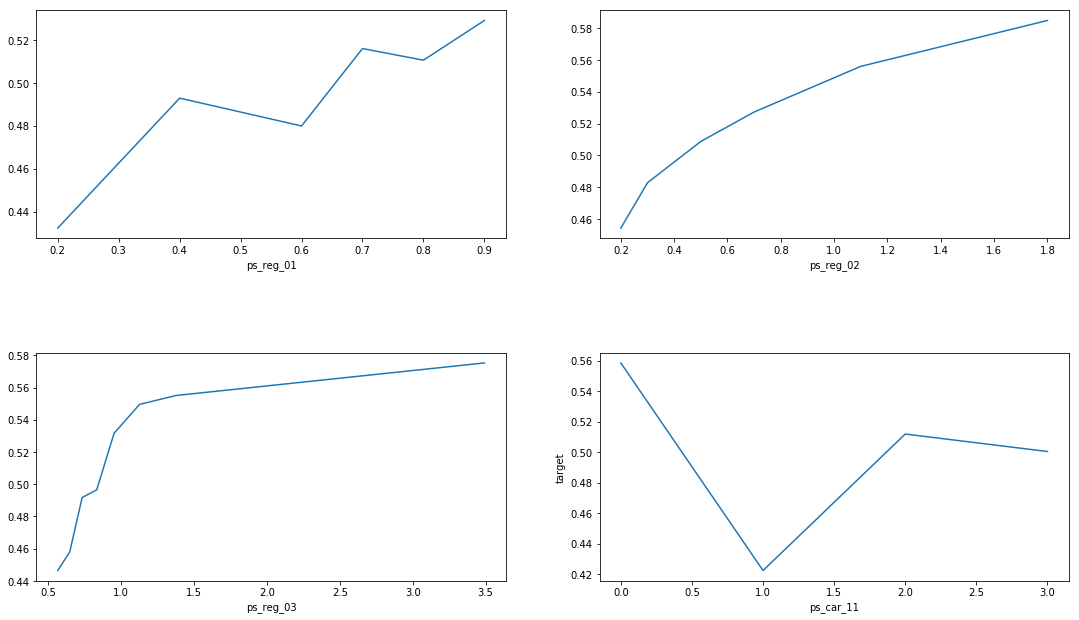

<Figure size 1440x1152 with 0 Axes>

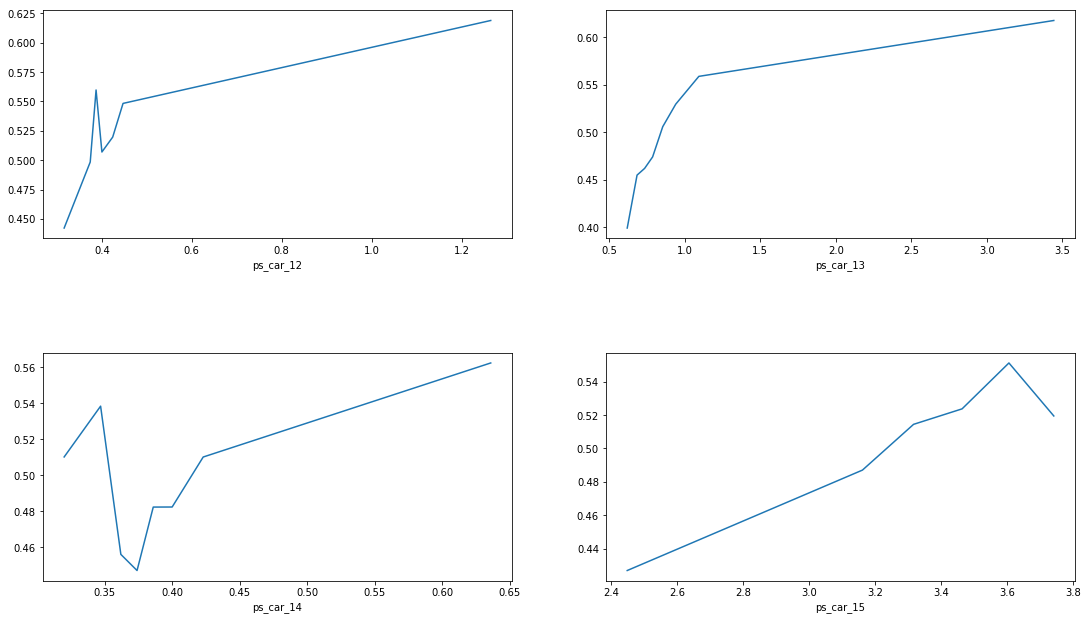

<Figure size 1440x1152 with 0 Axes>

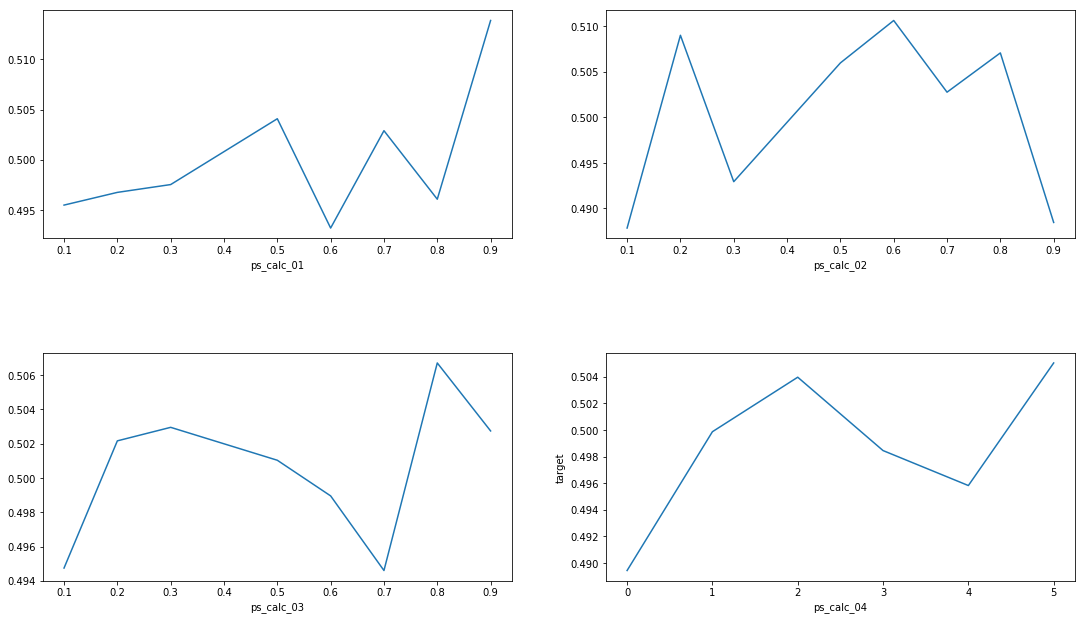

<Figure size 1440x1152 with 0 Axes>

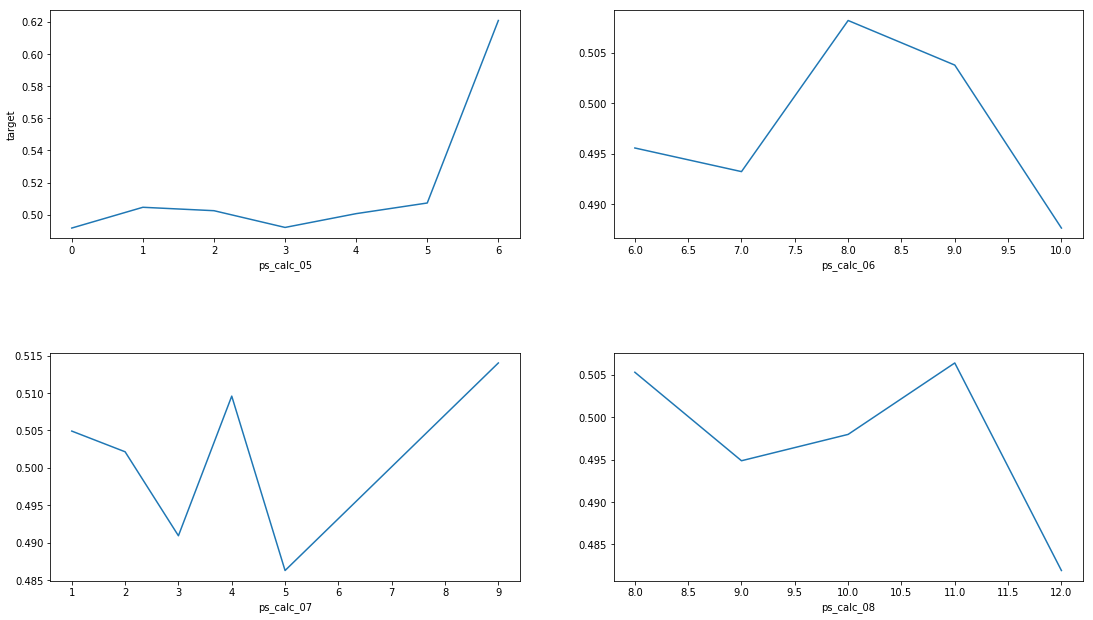

<Figure size 1440x1152 with 0 Axes>

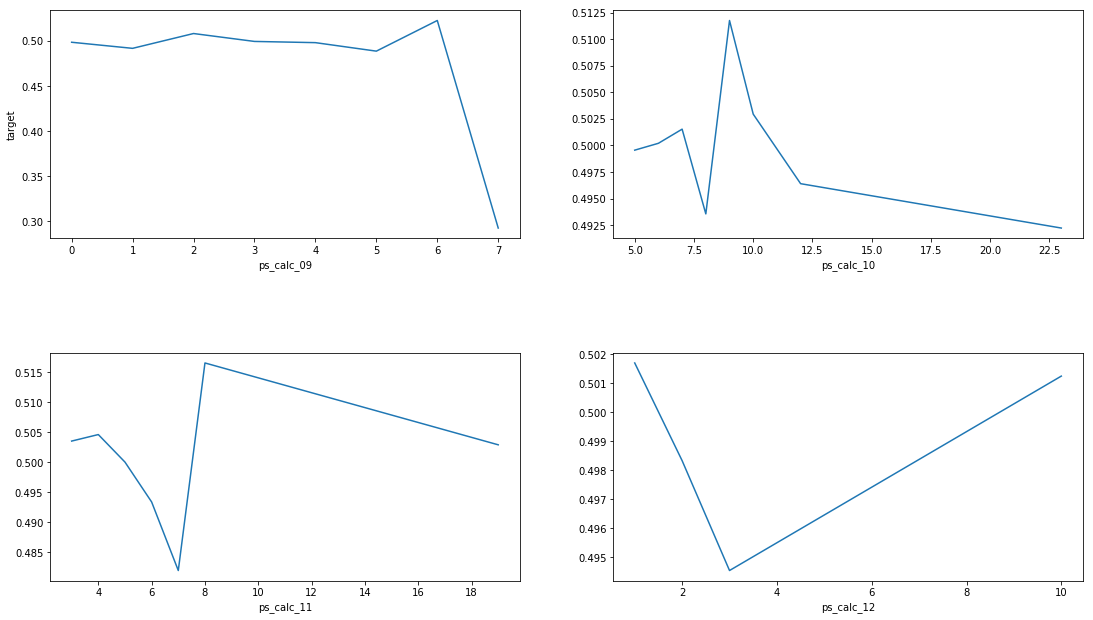

In [161]:
from itertools import product

logit_plots_path = r'C:\Users\mysel\OneDrive\Documents\Shan\Side Projects\Kaggle\SafeDriverProtection\graphs'
t = pd.concat([X_train[numeric_cols], y_train], axis=1)
print(X_train.shape, y_train.shape, t.shape)

def logit_chart(full_pd, numeric_cols):
    for i in range(int(len(numeric_cols) / 4)):
        plt.figure(figsize=(20,16))
        fig, ax = plt.subplots(2,2)
        fig.subplots_adjust(hspace=.5)
        ixs = list(product([0, 1], [0, 1]))
        sub_cols = numeric_cols[(i*4):(i*4+4)]
        for ix, j in zip(ixs, range(4)):
            if full_pd[sub_cols[j]].nunique() < 10:
                means = full_pd.groupby(sub_cols[j]).target.mean()
                print(full_pd.groupby(sub_cols[j]).target.agg(['count', 'mean']))
                sns.lineplot(x = means.index, y = means, ax = ax[ix[0]][ix[1]])
                ax[ix[0]][ix[1]].set(xlabel=sub_cols[j])
            else:
                full_pd['bins'] = pd.qcut(full_pd[sub_cols[j]], q=8, duplicates='drop')            
                means = full_pd.groupby('bins').target.mean()
                print(sub_cols[j])
                print(full_pd.groupby('bins').target.agg(['count', 'mean']))
                xs = list(pd.IntervalIndex(means.index).right)
                sns.lineplot(x = xs, y = means.to_list(), ax = ax[ix[0]][ix[1]])
                ax[ix[0]][ix[1]].set(xlabel=sub_cols[j])

        filename = os.path.join(logit_plots_path, 'logit_{}.png'.format(i))
        print(filename)
        fig.set_size_inches(18.5, 10.5)
        # fig.savefig('test2png.png', dpi=100)
        plt.savefig(filename, dpi = 100)
#         plt.show()
        

logit_chart(t, numeric_cols)

### Data Splitting

In [29]:
# print(train.shape)
# print(train.target.value_counts())

We see severe case class imbalance. While Splitting and modelig we have to handle the class imbalance issue

Split train and test split

In [30]:
input_columns = list(train.columns)
input_columns.remove('target')
np.random.seed(38017)
X_trainval, X_test, y_trainval, y_test  = train_test_split(train[input_columns], train['target'], test_size=0.2)

Split train and validation split

In [31]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2)
print(y_train.shape, y_val.shape)
print(y_train.value_counts())
print(y_val.value_counts())

(380935,) (95234,)
0    367046
1     13889
Name: target, dtype: int64
0    91786
1     3448
Name: target, dtype: int64


In [32]:
X_train_0, y_train_0 = X_train[y_train == 0], y_train[y_train == 0]
X_train_1, y_train_1 = X_train[y_train == 1], y_train[y_train == 1]

np.random.seed(38017)
X_train_0_us = X_train_0.sample(100000)
X_train_1_os = X_train_1.sample(100000, replace=True)

X_train = pd.concat([X_train_0_us, X_train_1_os], axis=0)
y_train = pd.concat([y_train_0[X_train_0_us.index], y_train_1[X_train_1_os.index]])
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(200000, 58)
(200000,)
1    100000
0    100000
Name: target, dtype: int64


In [33]:
l1 = np.abs(pd.concat([X_train[numeric_cols], y_train], axis=1).corr()).nlargest(5, 'target')['target'].index
s1 = np.abs(pd.concat([X_train[numeric_cols], y_train], axis=1).corr()).nsmallest(5, 'target')['target'].index

print(l1)
print(s1)

Index(['target', 'ps_car_13', 'ps_car_12', 'ps_reg_02', 'ps_reg_03'], dtype='object')
Index(['ps_calc_09', 'ps_calc_07', 'ps_calc_05', 'ps_calc_11', 'ps_calc_04'], dtype='object')


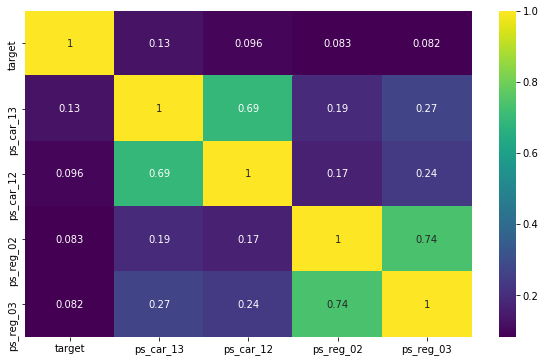

In [34]:
# c1 = pd.concat([X_train[numeric_cols], y_train], axis=1).corr().nlargest(5, 'target')
cm = pd.concat([X_train[numeric_cols + bin_columns + cat_columns], y_train], axis=1)[l1].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')
plt.show()

No handles with labels found to put in legend.


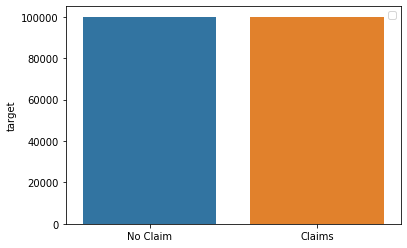

In [35]:
target_cnts = y_train.value_counts()
plt.figure()
sns.barplot(x=['No Claim', 'Claims'], y=target_cnts)
plt.legend()
plt.show()

In [36]:
# X_train[numeric_cols].isna().sum() / X_train.shape[0]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 457163 to 590862
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              200000 non-null  object 
 1   ps_ind_01       200000 non-null  int64  
 2   ps_ind_02_cat   199750 non-null  object 
 3   ps_ind_03       200000 non-null  int64  
 4   ps_ind_04_cat   199825 non-null  object 
 5   ps_ind_05_cat   196994 non-null  object 
 6   ps_ind_06_bin   200000 non-null  int64  
 7   ps_ind_07_bin   200000 non-null  int64  
 8   ps_ind_08_bin   200000 non-null  int64  
 9   ps_ind_09_bin   200000 non-null  int64  
 10  ps_ind_10_bin   200000 non-null  int64  
 11  ps_ind_11_bin   200000 non-null  int64  
 12  ps_ind_12_bin   200000 non-null  int64  
 13  ps_ind_13_bin   200000 non-null  int64  
 14  ps_ind_14       200000 non-null  int64  
 15  ps_ind_15       200000 non-null  int64  
 16  ps_ind_16_bin   200000 non-null  int64  
 17  ps_in

In [34]:
print(y_train.to_frame().sort_index().head())
print(X_train.sort_index().head())

    target
12       0
22       0
26       0
27       0
28       1
    id  ps_ind_01 ps_ind_02_cat  ps_ind_03 ps_ind_04_cat ps_ind_05_cat  \
12  36          2             1          1             1             0   
22  72          5             3          6             1             3   
26  79          0             1          4             1             0   
27  80          4             1          6             0             0   
28  84          0             2          0             1             4   

    ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  ...  \
12              0              0              1              0  ...   
22              0              1              0              0  ...   
26              0              0              1              0  ...   
27              0              0              0              1  ...   
28              1              0              0              0  ...   

    ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_calc_15

In [37]:
train_full = pd.concat([X_train, y_train], axis = 1)
len(train_full.columns)

59

No handles with labels found to put in legend.


<Figure size 1080x1296 with 0 Axes>

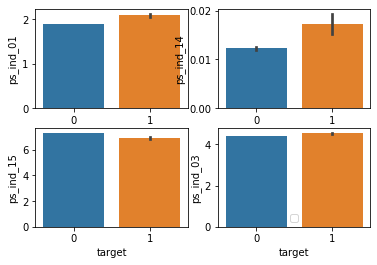

In [20]:
plt.figure(figsize=(15, 18))
fig, ax = plt.subplots(2,2)

for ix, col in enumerate(numeric_cols[:4]):
    ix1 = ix%2
    ix2 = [0,1,1,0][ix]
#     if ix > 1:
#         ix1 = np.abs(ix - 2)
#         ix2 = np.abs(1 - ix1)
    sns.barplot(train['target'], train[col], ax=ax[ix1][ix2])

plt.legend()
plt.show()

#### Reduce levels of ps_car_11_cat based on Proportion or ChiSq

In [38]:
from sklearn.pipeline import TransformerMixin

In [39]:
class concat_levels(TransformerMixin):
    def __init__(self, col_levels):
        self.col_levels = col_levels
        
    def fit(self):
        return self

    def merge_levels(self, x, levels):
        for level in levels:
            if x in level:
                return level[0]    
        return x

    def transform(self, df):
        for col, levels in self.col_levels:
            df[col] = df[col].apply(lambda x: self.merge_levels(x, levels))
        return df

In [41]:
ps_car_11_cat_mg_levels = [[99,39],[95,19],[53,10],[22, 16, 29],[37,77],[102,87],[96,30],[49,24],[68,98],[31,92],[6,51],[83,101,12],[25,1,50],[46,81,2,34],[13,104],[89,17],[33,71]]
col_levels = [('ps_car_11_cat', ps_car_11_cat_mg_levels)]

In [43]:
#Test the custom Transformer
ctran = concat_levels(col_levels)
ctran.fit()
output = ctran.transform(train_full)
print(output['ps_car_11_cat'].value_counts().shape)

(104,)


<Figure size 432x288 with 0 Axes>

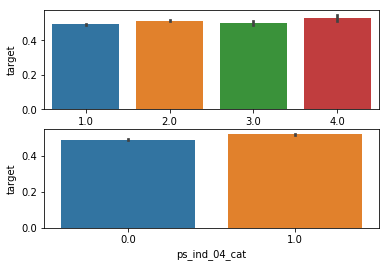

<Figure size 432x288 with 0 Axes>

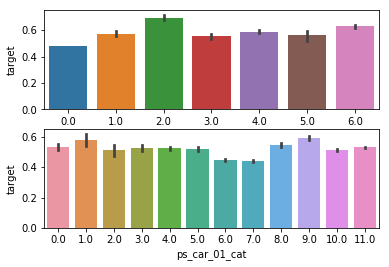

<Figure size 432x288 with 0 Axes>

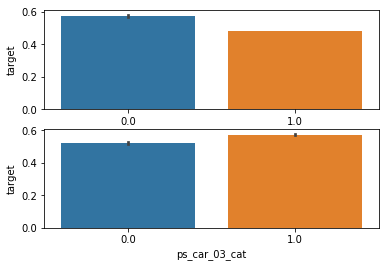

<Figure size 432x288 with 0 Axes>

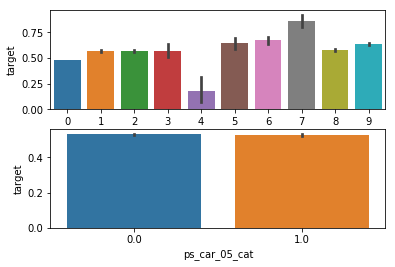

<Figure size 432x288 with 0 Axes>

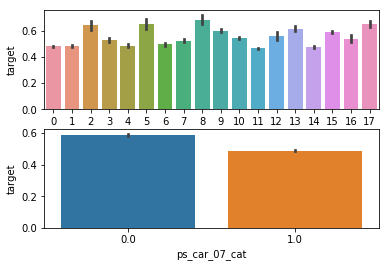

<Figure size 432x288 with 0 Axes>

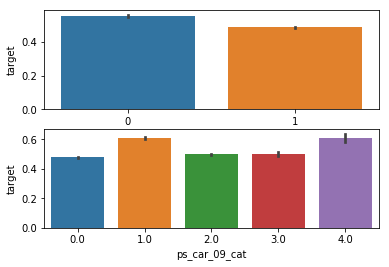

<Figure size 432x288 with 0 Axes>

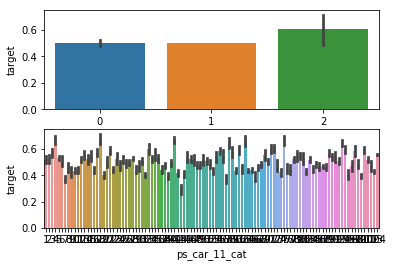

In [475]:
# plt.figure(figsize=(45, 15))
for iter1 in range(7):
    plt.figure()
    fig, ax = plt.subplots(2)
    
    for i in range(2):
#         for j in range(2):
            cur_col_ix = iter1 * 2 + i
            sns.barplot(x = cat_columns[cur_col_ix], y='target', data = train_bs, ax=ax[i])
            plt.xlabel(cat_columns[cur_col_ix])
    # plt.show()
    plt.savefig(os.path.join(graph_path, 'bar_plot_{}.png'.format(iter1)))
    

In [34]:
bin_columns

['ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

### Bar plots of all categorical Variable

In [ ]:
for iter1 in range(7):
    plt.figure()
    fig, ax = plt.subplots(2)
    
    for i in range(2):
#         for j in range(2):
            cur_col_ix = iter1 * 2 + i
            sns.barplot(x = cat_columns[cur_col_ix], y='target', data = train_bs, ax=ax[i])
            plt.xlabel(cat_columns[cur_col_ix])
    # plt.show()
    plt.savefig(os.path.join(graph_path, 'bar_plot_{}.png'.format(iter1)))


### Univariate Screening


In [44]:
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

In [45]:
uni_num_var = pd.DataFrame()
irr_numeric_var = pd.DataFrame()
for col in numeric_cols:
    tar_0 = train_full.loc[train_full.target == 0, col]
    tar_1 = train_full.loc[train_full.target == 1, col]
    
    f, p = f_oneway(tar_0, tar_1)
    ftest = {'col':col, 'p-value':round(p,4)}
    uni_num_var = uni_num_var.append(ftest, ignore_index=True)
    if p > 0.05: 
        print(f'Column: {col}, p-value: {p:.4f}')
        irr_numeric_var = irr_numeric_var.append(ftest, ignore_index=True)

Column: ps_calc_03, p-value: 0.0650
Column: ps_calc_04, p-value: 0.7849
Column: ps_calc_05, p-value: 0.8381
Column: ps_calc_06, p-value: 0.0626
Column: ps_calc_07, p-value: 0.8710
Column: ps_calc_08, p-value: 0.1847
Column: ps_calc_09, p-value: 0.9126
Column: ps_calc_10, p-value: 0.5656
Column: ps_calc_11, p-value: 0.8304
Column: ps_calc_12, p-value: 0.1607
Column: ps_calc_13, p-value: 0.5788


In [46]:
fil_numeric_var = [col for col in numeric_cols if col not in irr_numeric_var]

### Categorical Variable screening

In [47]:
uni_cat_var = pd.DataFrame()
irr_cat_var = pd.DataFrame()

for col in cat_columns + bin_columns:
    t = pd.crosstab(X_train[col], y_train)
    chisqval, pval, dof, expctd = chi2_contingency(t)
    chidict = {'col':col, 'p-val':pval}
    if pval > 0.05:
        print(f'{col}: {pval:.4f}')
        irr_cat_var = irr_cat_var.append(chidict, ignore_index=True)
    uni_cat_var = uni_cat_var.append(chidict, ignore_index=True)


ps_car_05_cat: 0.5743
ps_car_10_cat: 0.2705
ps_ind_13_bin: 0.5705
ps_calc_15_bin: 0.3372
ps_calc_16_bin: 0.9668
ps_calc_17_bin: 0.5894
ps_calc_18_bin: 0.5668
ps_calc_19_bin: 0.0588


In [48]:
fil_cat_columns = [col for col in cat_columns if col not in irr_cat_var.col.tolist()]
fil_bin_columns = [col for col in bin_columns if col not in irr_cat_var.col.tolist()]
print(len(cat_columns), len(fil_cat_columns), len(bin_columns), len(fil_bin_columns))

14 12 17 11


In [174]:
# from packages.decomposition.base_class import BaseDecompositionClass
from packages.decomposition.var_clus import VarClus

In [42]:
X_train[cat_columns + bin_columns + numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 457163 to 590862
Data columns (total 57 columns):
ps_ind_02_cat     199750 non-null object
ps_ind_04_cat     199825 non-null object
ps_ind_05_cat     196994 non-null object
ps_car_01_cat     199819 non-null object
ps_car_02_cat     200000 non-null object
ps_car_03_cat     68762 non-null object
ps_car_04_cat     200000 non-null object
ps_car_05_cat     116409 non-null object
ps_car_06_cat     200000 non-null object
ps_car_07_cat     194180 non-null object
ps_car_08_cat     200000 non-null object
ps_car_09_cat     199652 non-null object
ps_car_10_cat     200000 non-null object
ps_car_11_cat     200000 non-null int64
ps_ind_06_bin     200000 non-null int64
ps_ind_07_bin     200000 non-null int64
ps_ind_08_bin     200000 non-null int64
ps_ind_09_bin     200000 non-null int64
ps_ind_10_bin     200000 non-null int64
ps_ind_11_bin     200000 non-null int64
ps_ind_12_bin     200000 non-null int64
ps_ind_13_bin     200000 non-nul

In [175]:
clus = VarClus()

clus.decompose(X_train[numeric_cols].dropna())

C:\Users\mysel\OneDrive\Documents\Shan\Side Projects\Kaggle\SafeDriverProtection\packages\decomposition\var_clus.py:431: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  scaled_dataframe = pd.DataFrame(scale(dataframe), columns=dataframe.columns)


decomposing cluster cluster-0
phase #1: NCS
phase #2: Search
assessing feature ps_calc_01
current EV is 4.245518970536238, new EV is 4.245489432479433
assessing feature ps_calc_02
current EV is 4.245518970536238, new EV is 4.245523901699171
Feature ps_calc_02 was re-assigned
cluster-0-0 has 14 features and name_1 has 12 features
assessing feature ps_calc_03
current EV is 4.245523901699171, new EV is 4.245506129545227
assessing feature ps_calc_08
current EV is 4.245523901699171, new EV is 4.24552602576991
Feature ps_calc_08 was re-assigned
cluster-0-0 has 13 features and name_1 has 13 features
assessing feature ps_calc_10
current EV is 4.24552602576991, new EV is 4.245319713610473
Number of max tries has been reached. Returning current result...
decomposing cluster cluster-0-0
phase #1: NCS
phase #2: Search
assessing feature ps_calc_03
current EV is 3.402119738303348, new EV is 3.4021333398637674
Feature ps_calc_03 was re-assigned
cluster-0-0-0 has 5 features and name_1 has 8 features
a

In [177]:
clus.print_cluster_structure()

cluster-0
|
|-----cluster-0-0
|     |
|     |-----cluster-0-0-0
|     |     |
|     |     |-----cluster-0-0-0-0
|     |     |     |-----ps_car_12
|     |     |     |-----ps_car_13
|     |     |     |-----ps_car_14
|     |     |
|     |     |-----cluster-0-0-0-1
|     |           |-----ps_calc_13
|     |           |-----ps_calc_14
|     |
|     |-----cluster-0-0-1
|           |
|           |-----cluster-0-0-1-0
|           |     |-----ps_ind_01
|           |     |-----ps_ind_03
|           |     |-----ps_calc_01
|           |
|           |-----cluster-0-0-1-1
|                 |
|                 |-----cluster-0-0-1-1-0
|                 |     |-----ps_calc_10
|                 |     |-----ps_car_11
|                 |     |-----ps_car_15
|                 |
|                 |-----cluster-0-0-1-1-1
|                       |-----ps_calc_03
|                       |-----ps_calc_12
|
|-----cluster-0-1
      |
      |-----cluster-0-1-0
      |     |
      |     |-----cluster-0-1-0-0
      

I was not sure of results of this function, so I used results from SAS varclus procedure, since I'm more used to results of sas varclus procedure

In [49]:
train_full = pd.concat([X_train, y_train], axis=1)
val_full = pd.concat([X_val, y_val], axis=1)
test_full = pd.concat([X_test, y_test], axis=1)
print(train_full.target.value_counts())
print(train_full.shape, val_full.shape, test_full.shape)

1    100000
0    100000
Name: target, dtype: int64
(200000, 59) (95234, 59) (119043, 59)


In [50]:
clus_num_cols_by_variance = ['ps_calc_07', 'ps_calc_11', 'ps_calc_08', 'ps_ind_15', 'ps_calc_05', 
                  'ps_reg_02', 'ps_calc_12', 'ps_calc_10', 'ps_ind_03', 'ps_calc_14', 'ps_car_13']

train_full = pd.concat([X_train, y_train], axis=1)
train_full[numeric_cols].var().to_clipboard()
train_full[numeric_cols + ['target']].corr()['target'].to_clipboard()

In [51]:
print(len(X_train.columns))
print(X_train.columns)

58
Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      d

In [56]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, FunctionTransformer, RobustScaler
from sklearn.base import TransformerMixin
from sklearn.feature_extraction import DictVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import MissingIndicator


In [57]:
class NumCustomTransformer(TransformerMixin):
    def __init__(self):
        self.si = SimpleImputer(strategy='median')
        self.scaler = StandardScaler()
        pass

    def fit(self, X):
        self.feature_names = X.columns
        self.orig_columns = X.columns
        na_val = X.isna().sum()
        self.missing_cols = na_val[na_val > 0].index
        self.si.fit(X)
        self.scaler.fit(X)
        return self

    def get_feature_names(self):
        return self.feature_names

    def transform(self, X):
        
        #Handle Missing Values
        self.feature_names = X.columns
        
        for col in self.missing_cols:
            X.loc[:, col + '_miss'] = X[col].isna().astype(int)

        print(f'Numeric Var\nOriginal Shape: {len(self.feature_names)}')
        print(f'After Handling Missing Values, Shape of df: {X.shape}')

        self.feature_names = X.columns
        
        #Handle Imputation
        X_enc = self.si.transform(X[self.orig_columns])
        print(f'After Imputation Missing Values, Shape of df: {X_enc.shape}')
        
        #Handle scaling
        X_enc = self.scaler.fit_transform(X_enc)
        print(f'After Scaling Missing Values, Shape of df: {X_enc.shape}')
#         print(X[list(map(lambda x: x + '_miss', missing_cols))].head())
        print(list(map(lambda x: x + '_miss', self.missing_cols)))
        t = pd.concat([pd.DataFrame(X_enc, columns=self.orig_columns), 
                       X[list(map(lambda x: x + '_miss', self.missing_cols))].reset_index(drop=True)], axis=1)
        print(f'Final Missing + Imputing Values, Shape of df: {t.shape}')
        
        del X
        del X_enc
        return t

In [54]:
num_tran = NumCustomTransformer()
X = num_tran.fit_transform(train_full[fil_numeric_var])

C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Numeric Var
Original Shape: 26
After Handling Missing Values, Shape of df: (200000, 29)
After Imputation Missing Values, Shape of df: (200000, 26)
After Scaling Missing Values, Shape of df: (200000, 26)
['ps_reg_03_miss', 'ps_car_11_miss', 'ps_car_14_miss']
Final Missing + Imputing Values, Shape of df: (200000, 29)


In [121]:
# num_tran = NumCustomTransformer()
val_full.reset_index(drop=True, inplace=True)
# val_full[fil_numeric_var]
X_val = num_tran.transform(val_full[fil_numeric_var])

C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Numeric Var
Original Shape: 26
After Handling Missing Values, Shape of df: (95234, 29)
After Imputation Missing Values, Shape of df: (95234, 26)
After Scaling Missing Values, Shape of df: (95234, 26)
['ps_reg_03_miss', 'ps_car_11_miss', 'ps_car_14_miss']
Final Missing + Imputing Values, Shape of df: (95234, 29)


In [58]:
class CatCustomTransformer(TransformerMixin):
    def __init__(self):
        self.feature_names = None
        self.si = SimpleImputer(strategy='most_frequent')
        self.one_enc = OneHotEncoder(drop='first')
        pass

    def fit(self, X):
        na_val = X.isna().sum()
        self.missing_cols = list(na_val[na_val > 0].index)
        self.feature_names = X.columns
        self.orig_columns = X.columns
        X[self.orig_columns] = self.si.fit_transform(X)
        self.one_enc.fit(X)
        return self

    def get_feature_names(self):
        return self.feature_names

    def transform(self, X):
        self.feature_names = X.columns
        print('Transform Method')
#         Handle Missing Values
        for col in self.missing_cols:
            X[col + '_miss'] = X[col].isna().astype(int)
        print(f'Cat Var\nOriginal Shape: {len(self.feature_names)}')
        self.feature_names = X.columns
        print(f'After Handling Missing Values\nOriginal Shape: {len(self.feature_names)}')

#         Imputation
        X[self.orig_columns] = self.si.transform(X[self.orig_columns])
        print(f'After Handling Missing Values, Shape of df: {X.shape}')
        
#         Dummy Coding
        X_enc = self.one_enc.transform(X[self.orig_columns])
        print(f'After Dummy Encoding: {X_enc.shape}')

        X_enc = pd.DataFrame(X_enc.toarray(), 
                             columns = self.one_enc.get_feature_names(self.orig_columns))
        t = pd.concat([X_enc.reset_index(drop=True), 
                       X[list(map(lambda x: x + '_miss', self.missing_cols))].reset_index(drop=True)], 
                      axis = 1)
        del X_enc
        del X

        print(f'After Dummy Coding Missing Values, Shape of df: {t.shape}')        
        self.feature_names = t.columns
        
    
        return t

In [123]:
tran1 = CatCustomTransformer()
train_full[cat_columns] = train_full[cat_columns].replace('nan', np.NaN)
t = tran1.fit_transform(train_full[cat_columns])

C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\frame.py:2969: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\frame.py:2935: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

Transform Method


C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Cat Var
Original Shape: 14
After Handling Missing Values
Original Shape: 22


C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


After Handling Missing Values, Shape of df: (200000, 22)
After Dummy Encoding: (200000, 161)
After Dummy Coding Missing Values, Shape of df: (200000, 169)


In [125]:
t = tran1.transform(val_full[cat_columns])

Transform Method
Cat Var
Original Shape: 14
After Handling Missing Values
Original Shape: 22


C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mysel\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mysel\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

After Handling Missing Values, Shape of df: (95234, 22)
After Dummy Encoding: (95234, 161)
After Dummy Coding Missing Values, Shape of df: (95234, 169)


In [64]:
class CreateMissingIndicators(TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X):
        self.feature_names = X.columns
        self.orig_cols = X.columns
        navl = X.isna().sum()
        self.missing_cols = list(navl[navl>0].index)
        self.si = SimpleImputer(strategy='most_frequent').fit(X)
        return self
    def get_feature_names(self):
        return self.feature_names
    
    def transform(self, X):
        self.feature_names = X.columns
        for col in self.missing_cols:
            X[col + '_miss'] = X[col].isna().astype(int)
        X_enc = self.si.transform(X[self.orig_cols])
        X_enc = pd.DataFrame(X_enc, columns=self.orig_cols)
        t = pd.concat([X_enc, X[list(map(lambda x: x + '_miss', self.missing_cols))].reset_index(drop=True)], axis=1)
        self.feature_names = t.columns
        return t

In [65]:
cmi = CreateMissingIndicators()
X = cmi.fit_transform(train_full[bin_columns].replace('nan', np.NaN))
X.head()

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
3,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0


In [66]:

si = SimpleImputer(missing_values=np.nan, strategy='median')

num_pipeline = Pipeline([
    ('num_handling', NumCustomTransformer())
])

cat_pipeline = Pipeline([
    ('cat_handling', CatCustomTransformer())
])

bin_pipeline = Pipeline([
    ('bin_missing', CreateMissingIndicators())
#     ,('bin_imputer', SimpleImputer(strategy='most_frequent'))
])

steps = ColumnTransformer([
            ('num_pipeline', num_pipeline, fil_numeric_var)
            ,('cat_pipleine', cat_pipeline, fil_cat_columns)
            ,('bin_pipeline', bin_pipeline, fil_bin_columns)
        ])

In [507]:
full_val = pd.concat([X_val, y_val], axis=1)
full_val.shape

(95234, 59)

In [128]:
train_full[fil_cat_columns] = train_full[fil_cat_columns].replace('nan', np.NaN)
X_train_trans = steps.fit_transform(train_full)
# X_val_trans = steps.fit_transform(X_val.reset_index())

Numeric Var
Original Shape: 26
After Handling Missing Values, Shape of df: (200000, 29)
After Imputation Missing Values, Shape of df: (200000, 26)
After Scaling Missing Values, Shape of df: (200000, 26)
['ps_reg_03_miss', 'ps_car_11_miss', 'ps_car_14_miss']
Final Missing + Imputing Values, Shape of df: (200000, 29)
Transform Method
Cat Var
Original Shape: 13
After Handling Missing Values
Original Shape: 21
After Handling Missing Values, Shape of df: (200000, 21)
After Dummy Encoding: (200000, 159)
After Dummy Coding Missing Values, Shape of df: (200000, 167)


In [75]:
num_trans_cols = list(steps.named_transformers_['num_pipeline'].named_steps['num_handling'].get_feature_names())
cat_trans_cols = list(steps.named_transformers_['cat_pipleine'].named_steps['cat_handling'].get_feature_names())
bin_trans_cols = list(steps.named_transformers_['bin_pipeline'].named_steps['bin_missing'].get_feature_names())

trans_cols = num_trans_cols + cat_trans_cols + bin_trans_cols

print(len(trans_cols), X_train_trans.shape)

207 (200000, 207)


In [130]:
val_full[fil_cat_columns] = val_full[fil_cat_columns].replace('nan', np.NaN)
test_full[fil_cat_columns] = val_full[fil_cat_columns].replace('nan', np.NaN)

val_full[fil_bin_columns] = val_full[fil_bin_columns].dropna()
test_full[fil_bin_columns] = test_full[fil_bin_columns].dropna()

X_val_trans = steps.transform(val_full.reset_index(drop=True))
X_test_trans = steps.transform(test_full.reset_index(drop=True))

Numeric Var
Original Shape: 26
After Handling Missing Values, Shape of df: (95234, 29)
After Imputation Missing Values, Shape of df: (95234, 26)
After Scaling Missing Values, Shape of df: (95234, 26)
['ps_reg_03_miss', 'ps_car_11_miss', 'ps_car_14_miss']
Final Missing + Imputing Values, Shape of df: (95234, 29)
Transform Method
Cat Var
Original Shape: 13
After Handling Missing Values
Original Shape: 21
After Handling Missing Values, Shape of df: (95234, 21)
After Dummy Encoding: (95234, 159)
After Dummy Coding Missing Values, Shape of df: (95234, 167)
Numeric Var
Original Shape: 26
After Handling Missing Values, Shape of df: (119043, 29)
After Imputation Missing Values, Shape of df: (119043, 26)
After Scaling Missing Values, Shape of df: (119043, 26)
['ps_reg_03_miss', 'ps_car_11_miss', 'ps_car_14_miss']
Final Missing + Imputing Values, Shape of df: (119043, 29)
Transform Method
Cat Var
Original Shape: 13
After Handling Missing Values
Original Shape: 21
After Handling Missing Values, S

In [69]:
#Max Features for Random Forest. log, and sqrt of total feature
X_train_trans.shape, np.log(X_train_trans.shape[1]), np.sqrt(X_train_trans.shape[1])

((200000, 205), 5.3230099791384085, 14.317821063276353)

In [193]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'max_depth': [3,5,7,9], 'max_features' : [5, 10, 15], 'n_estimators' : [50, 100, 125, 150, 200], 
          'max_leaf_nodes':[8, 16, 50, None], 'criterion':['gini', 'entropy']}

forest1 = RandomForestClassifier(n_estimators = 150, max_features=10, oob_score=True, n_jobs=-1)
rcv = RandomizedSearchCV(forest1, param_grid, scoring=['roc_auc', 'accuracy', 'f1'], refit=False)

# forest1.fit(X_train_trans, y_train)

In [194]:
rcv.fit(X_train_trans, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=10,
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                

In [230]:
t = pd.DataFrame(list(zip(rcv.cv_results_['params'], rcv.cv_results_['mean_test_accuracy'], rcv.cv_results_['mean_test_roc_auc'], rcv.cv_results_['mean_test_f1'])), columns=['params', 'accuracy', 'auc', 'f1'])
print(t.head())
t.sort_values(by=['auc'], ascending=False)
best_forest = t.iloc[0,0]
print(f'Best Estimator{t.iloc[0,0]}')
print(t.iloc[0,1:])

                                              params  accuracy       auc  \
0  {'n_estimators': 100, 'max_leaf_nodes': 16, 'm...  0.587425  0.624015   
1  {'n_estimators': 150, 'max_leaf_nodes': 8, 'ma...  0.584305  0.619304   
2  {'n_estimators': 150, 'max_leaf_nodes': 50, 'm...  0.590850  0.627499   
3  {'n_estimators': 50, 'max_leaf_nodes': 8, 'max...  0.585010  0.618520   
4  {'n_estimators': 125, 'max_leaf_nodes': None, ...  0.604035  0.648802   

         f1  
0  0.586495  
1  0.577856  
2  0.582343  
3  0.578510  
4  0.601418  
Best Estimator{'n_estimators': 100, 'max_leaf_nodes': 16, 'max_features': 15, 'max_depth': 7, 'criterion': 'gini'}
accuracy    0.587425
auc         0.624015
f1          0.586495
Name: 0, dtype: object


In [224]:
forest1 = RandomForestClassifier(n_estimators=100, max_leaf_nodes=16, max_features=15, max_depth=7, criterion='gini')
forest1.fit(X_train_trans, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=15,
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [225]:
rsq1 = forest1.score(X_train_trans, y_train)
rsq2 = forest1.score(X_test_trans, y_test)

pred1 = forest1.predict_proba(X_train_trans)[:, 1]
pred2 = forest1.predict_proba(X_test_trans)[:, 1]

In [226]:
imp = pd.DataFrame(list(zip(trans_cols, forest1.feature_importances_)), columns=['col', 'importance'])
imp = imp.sort_values(by='importance', ascending=False)
print(imp.shape)
imp.head()


(207, 2)


,col,importance
9,ps_car_13,0.153823
197,ps_ind_07_bin,0.074113
196,ps_ind_06_bin,0.073702
204,ps_ind_17_bin,0.071272
6,ps_reg_03,0.069049


In [227]:
auc1 = roc_auc_score(y_train, pred1)
auc2 = roc_auc_score(y_test, pred2)

print(f'Train: R-square{rsq1}, auc: {auc1}')
print(f'Test: R-square{rsq2}, auc: {auc2}')


Train: R-square0.587505, auc: 0.6249125253000001
Test: R-square0.562905840746621, auc: 0.613354345037445


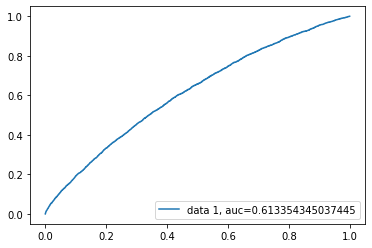

In [228]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, pred2)
auc = roc_auc_score(y_train, pred1)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

Thank You. 
Ill be trying few more models using same data later. 